<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Ответ. Нет нулевых элементов)

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

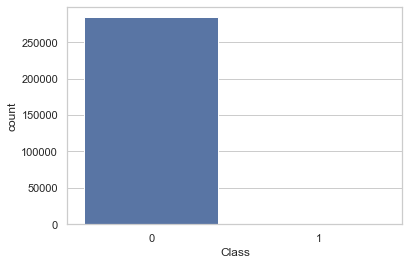

In [5]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.countplot(x="Class", data=dataset)

In [6]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'График для двух классов')

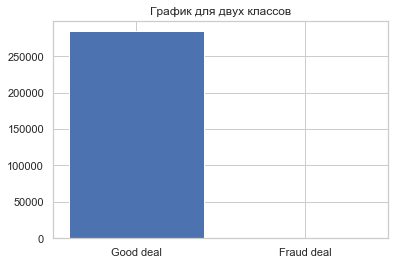

In [7]:
import numpy as np
index = np.arange(len(dataset['Class'].value_counts()))
x_axis = ['Good deal',  'Fraud deal']
plt.bar(index, dataset['Class'].value_counts())
plt.xticks(index, x_axis)
plt.title("График для двух классов")

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

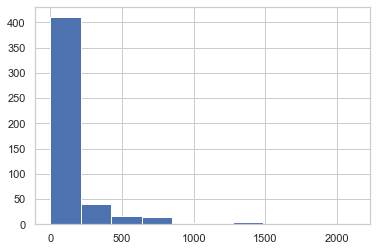

In [8]:
dataset_fraud= dataset[dataset['Class']==1]['Amount']
dataset_fraud.hist()

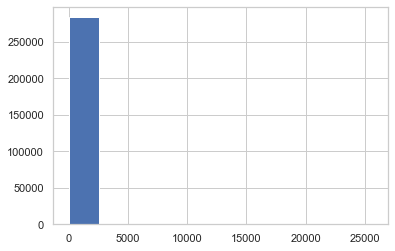

In [9]:
dataset_nofraud= dataset[dataset['Class']==0]['Amount']
dataset_nofraud.hist()

**5. Построить графики histograms для всех значений**

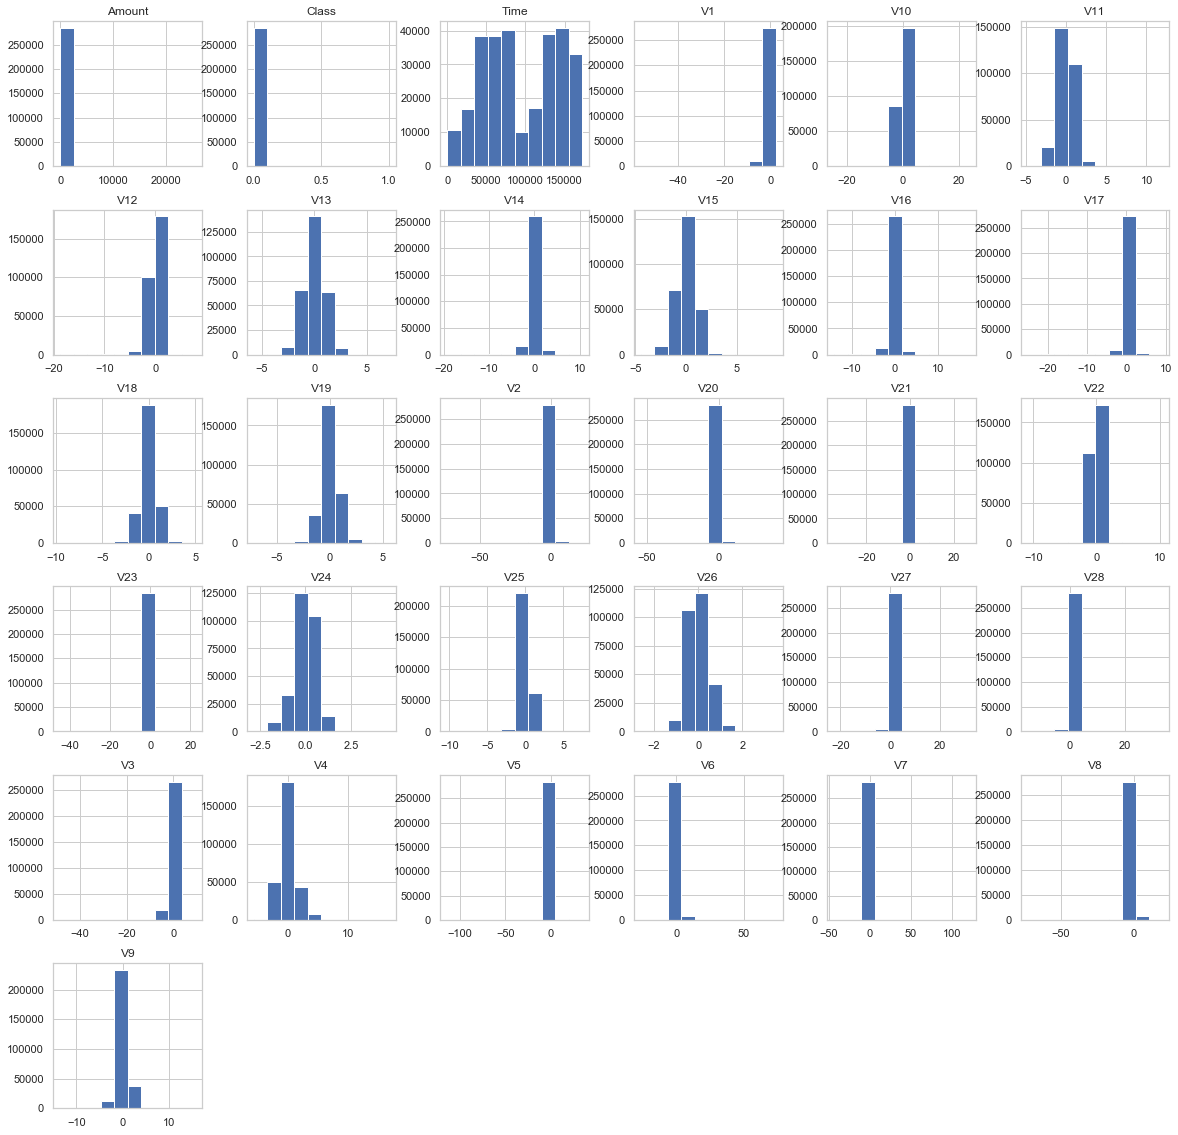

In [10]:
dataset.hist(figsize=(20,20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

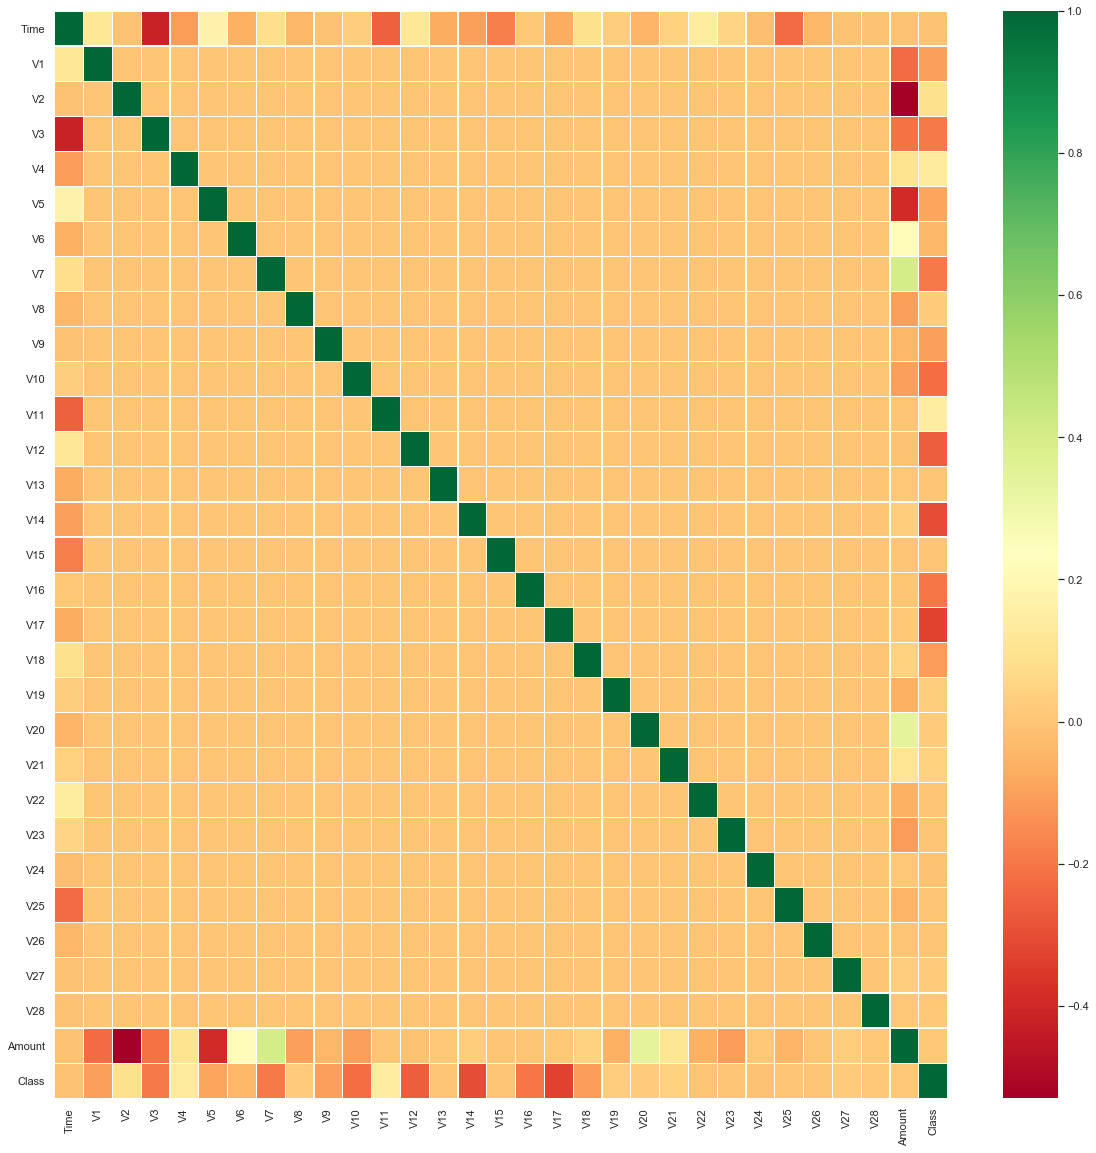

In [11]:
f, ax = plt.subplots(figsize=(20, 20))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

In [12]:
dataset.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-125860.970747,-24.300717
V1,1.091960e+04,3.836489e+00,-3.129516e-16,-1.507277e-15,-6.514502e-16,7.185112e-16,3.768192e-16,2.299236e-16,-9.580150e-17,2.043765e-16,...,-1.377147e-16,1.397105e-16,1.852162e-16,-6.227097e-17,-2.490839e-16,-1.279349e-16,9.739819e-17,2.682442e-16,-111.556566,-0.008244
V2,-8.307031e+02,-3.129516e-16,2.726820e+00,1.788295e-16,-3.895928e-16,2.937913e-16,8.302796e-16,-2.331170e-16,-5.748090e-17,-1.644592e-16,...,8.941473e-17,2.075699e-16,1.413072e-16,-1.065792e-16,9.899488e-17,2.043765e-16,-3.351057e-16,-2.172499e-16,-219.485433,0.006260
V3,-3.021425e+04,-1.507277e-15,1.788295e-16,2.299029e+00,-4.806042e-16,-1.235839e-15,2.899592e-15,2.043765e-16,-1.788295e-16,1.852162e-16,...,-1.920022e-16,-2.139567e-16,-5.628338e-17,1.037850e-17,8.143127e-17,-1.612659e-16,3.101573e-16,3.628482e-16,-79.975549,-0.012150
V4,-7.077378e+03,-6.514502e-16,-3.895928e-16,-4.806042e-16,2.004684e+00,-3.583774e-15,-8.015392e-16,-9.580150e-17,1.140038e-15,9.723852e-16,...,-4.909827e-17,2.474872e-16,1.816237e-16,1.322260e-16,4.666331e-16,-2.766268e-16,-7.105278e-17,-5.688214e-18,34.964556,0.007846
V5,1.134407e+04,7.185112e-16,2.937913e-16,-1.235839e-15,-3.583774e-15,1.905081e+00,1.149618e-15,3.832060e-17,7.360748e-16,7.408649e-16,...,-6.067428e-17,7.983458e-18,8.622135e-17,-8.051317e-16,-7.025443e-17,2.187468e-16,2.411004e-16,-8.961432e-17,-133.380790,-0.005444
V6,-3.986868e+03,3.768192e-16,8.302796e-16,2.899592e-15,-8.015392e-16,1.149618e-15,1.774946e+00,-1.261386e-16,-5.221182e-16,-1.788295e-16,...,-8.143127e-17,-9.819653e-17,3.113549e-17,-8.550284e-16,3.800126e-16,-1.668543e-16,-7.664120e-17,1.938733e-16,71.970931,-0.002415
V7,4.976739e+03,2.299236e-16,-2.331170e-16,2.043765e-16,-9.580150e-17,3.832060e-17,-1.261386e-16,1.530401e+00,-1.309287e-16,7.025443e-17,...,2.075699e-17,-5.795991e-16,-2.027798e-16,-7.783872e-18,2.554707e-17,-4.630406e-16,-1.181552e-16,3.173425e-17,122.936845,-0.009620
V8,-2.095683e+03,-9.580150e-17,-5.748090e-17,-1.788295e-16,1.140038e-15,7.360748e-16,-5.221182e-16,-1.309287e-16,1.426479e+00,5.364884e-16,...,1.676526e-17,2.155534e-17,1.197519e-16,-1.504882e-16,-8.861638e-17,2.395037e-18,1.596692e-16,-2.189463e-16,-30.792991,0.000986
V9,-4.518322e+02,2.043765e-16,-1.644592e-16,1.852162e-16,9.723852e-16,7.408649e-16,-1.788295e-16,7.025443e-17,5.364884e-16,1.206992e+00,...,1.943972e-16,-1.245419e-16,-3.911894e-17,-1.904055e-16,1.564758e-16,-5.588421e-17,-7.244988e-17,2.933921e-16,-12.158248,-0.004459


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [14]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

NameError: name 'X_train_22' is not defined

In [13]:
data = dataset.iloc[:,:29]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [14]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.189726,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.103861,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,-0.226634,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,-0.065885,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.252121,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020


In [15]:
headers = list(data.columns.values)

In [16]:
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.189726,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.103861,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,-0.226634,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,-0.065885,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.252121,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020


In [17]:
output_y = dataset.iloc[:,29:]
#input_x = dataset_temp.iloc[:,:27]
input_x = dataset.iloc[:,29:]

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Amount    284428
Class        379
dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


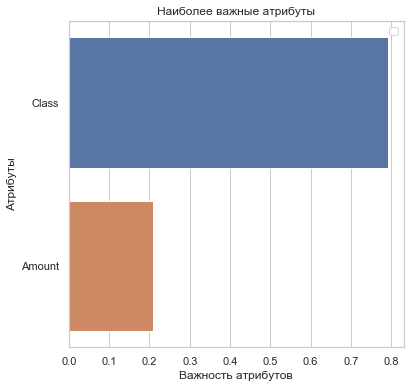

In [21]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Как делать classification report:

In [22]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85325
           1       1.00      1.00      1.00       118

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [23]:
output_y = dataset.iloc[:,29:]
#input_x = dataset_temp.iloc[:,:27]
input_x = input_x = df_norm

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Amount    284428
Class        379
dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


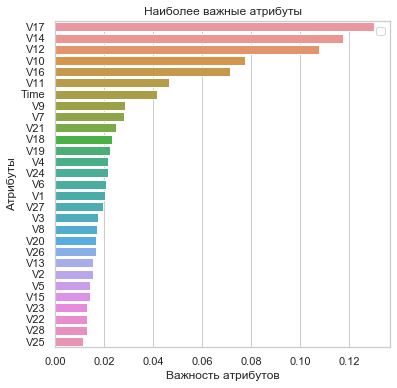

In [27]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

#Да данные нужно нормализовывать.

In [34]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.84      0.67      0.74       108

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



0.9994148145547324

In [ ]:
#Предсказали 99%

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398196


In [30]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199098, 1: 199098}